## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  33.105284  1411.799697  0.173067  2.407939  1.481035
1  55.385926   199.784827  0.240610  8.200738  0.574246
2  82.799848   319.519899  0.349643  6.079409  0.829851
3   2.375241  1297.649024  0.648789  7.890251  1.502141
4   4.591917   634.423269  0.044237  5.940680  1.473802


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0365275	total: 58ms	remaining: 57.9s
1:	learn: 1.0271486	total: 58.7ms	remaining: 29.3s
2:	learn: 1.0166590	total: 59.2ms	remaining: 19.7s
3:	learn: 1.0078148	total: 59.7ms	remaining: 14.9s
4:	learn: 0.9985003	total: 60.2ms	remaining: 12s
5:	learn: 0.9914902	total: 60.6ms	remaining: 10s
6:	learn: 0.9807383	total: 61.1ms	remaining: 8.66s
7:	learn: 0.9705148	total: 61.5ms	remaining: 7.63s
8:	learn: 0.9617510	total: 61.9ms	remaining: 6.82s
9:	learn: 0.9519939	total: 62.2ms	remaining: 6.16s
10:	learn: 0.9423761	total: 62.6ms	remaining: 5.62s
11:	learn: 0.9342096	total: 62.9ms	remaining: 5.18s
12:	learn: 0.9271632	total: 63.3ms	remaining: 4.8s
13:	learn: 0.9178636	total: 63.7ms	remaining: 4.48s
14:	learn: 0.9088103	total: 64ms	remaining: 4.2s
15:	learn: 0.9011147	total: 64.4ms	remaining: 3.96s
16:	learn: 0.8932054	total: 64.8ms	remaining: 3.74s
17:	learn: 0.8858673	total: 65.1ms	remaining: 3.55s
18:	learn: 0.8787421	total: 65.5ms	remaining: 3.38s
19

105:	learn: 0.4639973	total: 96.4ms	remaining: 813ms
106:	learn: 0.4615486	total: 96.8ms	remaining: 808ms
107:	learn: 0.4592490	total: 97.3ms	remaining: 804ms
108:	learn: 0.4558137	total: 97.7ms	remaining: 798ms
109:	learn: 0.4537838	total: 98.1ms	remaining: 793ms
110:	learn: 0.4512891	total: 98.3ms	remaining: 787ms
111:	learn: 0.4487388	total: 98.6ms	remaining: 781ms
112:	learn: 0.4463551	total: 98.8ms	remaining: 775ms
113:	learn: 0.4441181	total: 99ms	remaining: 770ms
114:	learn: 0.4414586	total: 99.3ms	remaining: 764ms
115:	learn: 0.4387876	total: 99.7ms	remaining: 760ms
116:	learn: 0.4363487	total: 100ms	remaining: 755ms
117:	learn: 0.4337188	total: 100ms	remaining: 750ms
118:	learn: 0.4313736	total: 101ms	remaining: 746ms
119:	learn: 0.4292605	total: 101ms	remaining: 741ms
120:	learn: 0.4273731	total: 101ms	remaining: 736ms
121:	learn: 0.4251804	total: 102ms	remaining: 731ms
122:	learn: 0.4233303	total: 102ms	remaining: 726ms
123:	learn: 0.4206833	total: 102ms	remaining: 723ms
124

338:	learn: 0.1714718	total: 182ms	remaining: 356ms
339:	learn: 0.1710508	total: 183ms	remaining: 355ms
340:	learn: 0.1706686	total: 184ms	remaining: 355ms
341:	learn: 0.1698111	total: 184ms	remaining: 354ms
342:	learn: 0.1690860	total: 184ms	remaining: 353ms
343:	learn: 0.1688582	total: 185ms	remaining: 353ms
344:	learn: 0.1685926	total: 185ms	remaining: 352ms
345:	learn: 0.1680760	total: 186ms	remaining: 351ms
346:	learn: 0.1673507	total: 186ms	remaining: 350ms
347:	learn: 0.1669269	total: 186ms	remaining: 349ms
348:	learn: 0.1663433	total: 187ms	remaining: 349ms
349:	learn: 0.1658456	total: 187ms	remaining: 348ms
350:	learn: 0.1654538	total: 188ms	remaining: 347ms
351:	learn: 0.1649603	total: 188ms	remaining: 347ms
352:	learn: 0.1646877	total: 189ms	remaining: 346ms
353:	learn: 0.1643713	total: 189ms	remaining: 345ms
354:	learn: 0.1638984	total: 190ms	remaining: 344ms
355:	learn: 0.1636167	total: 190ms	remaining: 344ms
356:	learn: 0.1627486	total: 190ms	remaining: 343ms
357:	learn: 

551:	learn: 0.0994580	total: 276ms	remaining: 224ms
552:	learn: 0.0991106	total: 277ms	remaining: 224ms
553:	learn: 0.0990014	total: 277ms	remaining: 223ms
554:	learn: 0.0989409	total: 278ms	remaining: 223ms
555:	learn: 0.0986027	total: 278ms	remaining: 222ms
556:	learn: 0.0984715	total: 278ms	remaining: 221ms
557:	learn: 0.0983538	total: 279ms	remaining: 221ms
558:	learn: 0.0981121	total: 279ms	remaining: 220ms
559:	learn: 0.0977841	total: 280ms	remaining: 220ms
560:	learn: 0.0976682	total: 280ms	remaining: 219ms
561:	learn: 0.0975537	total: 281ms	remaining: 219ms
562:	learn: 0.0970241	total: 281ms	remaining: 218ms
563:	learn: 0.0968317	total: 281ms	remaining: 217ms
564:	learn: 0.0967192	total: 282ms	remaining: 217ms
565:	learn: 0.0966159	total: 282ms	remaining: 216ms
566:	learn: 0.0962981	total: 283ms	remaining: 216ms
567:	learn: 0.0957820	total: 283ms	remaining: 215ms
568:	learn: 0.0956716	total: 284ms	remaining: 215ms
569:	learn: 0.0956157	total: 284ms	remaining: 214ms
570:	learn: 

759:	learn: 0.0633668	total: 364ms	remaining: 115ms
760:	learn: 0.0631901	total: 365ms	remaining: 114ms
761:	learn: 0.0630548	total: 365ms	remaining: 114ms
762:	learn: 0.0629307	total: 365ms	remaining: 113ms
763:	learn: 0.0627369	total: 366ms	remaining: 113ms
764:	learn: 0.0626744	total: 366ms	remaining: 112ms
765:	learn: 0.0625980	total: 366ms	remaining: 112ms
766:	learn: 0.0624647	total: 367ms	remaining: 111ms
767:	learn: 0.0624034	total: 367ms	remaining: 111ms
768:	learn: 0.0622302	total: 368ms	remaining: 110ms
769:	learn: 0.0621548	total: 368ms	remaining: 110ms
770:	learn: 0.0620948	total: 369ms	remaining: 110ms
771:	learn: 0.0620206	total: 369ms	remaining: 109ms
772:	learn: 0.0619473	total: 370ms	remaining: 109ms
773:	learn: 0.0618887	total: 370ms	remaining: 108ms
774:	learn: 0.0618165	total: 370ms	remaining: 108ms
775:	learn: 0.0616842	total: 371ms	remaining: 107ms
776:	learn: 0.0616186	total: 371ms	remaining: 106ms
777:	learn: 0.0615186	total: 371ms	remaining: 106ms
778:	learn: 

973:	learn: 0.0378040	total: 457ms	remaining: 12.2ms
974:	learn: 0.0377344	total: 458ms	remaining: 11.7ms
975:	learn: 0.0377002	total: 458ms	remaining: 11.3ms
976:	learn: 0.0376648	total: 459ms	remaining: 10.8ms
977:	learn: 0.0376267	total: 459ms	remaining: 10.3ms
978:	learn: 0.0375823	total: 460ms	remaining: 9.86ms
979:	learn: 0.0374781	total: 460ms	remaining: 9.39ms
980:	learn: 0.0373089	total: 460ms	remaining: 8.92ms
981:	learn: 0.0372742	total: 461ms	remaining: 8.45ms
982:	learn: 0.0372370	total: 461ms	remaining: 7.97ms
983:	learn: 0.0370713	total: 462ms	remaining: 7.5ms
984:	learn: 0.0370084	total: 462ms	remaining: 7.04ms
985:	learn: 0.0369318	total: 463ms	remaining: 6.57ms
986:	learn: 0.0368972	total: 463ms	remaining: 6.1ms
987:	learn: 0.0368607	total: 463ms	remaining: 5.63ms
988:	learn: 0.0368248	total: 464ms	remaining: 5.16ms
989:	learn: 0.0367230	total: 464ms	remaining: 4.69ms
990:	learn: 0.0365708	total: 465ms	remaining: 4.22ms
991:	learn: 0.0365190	total: 465ms	remaining: 3.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

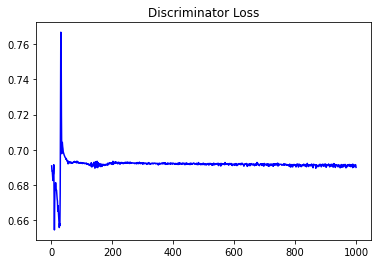

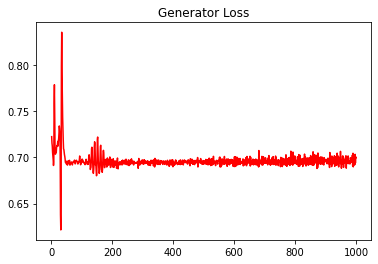

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.19539583255605522


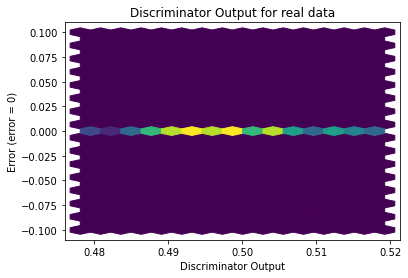

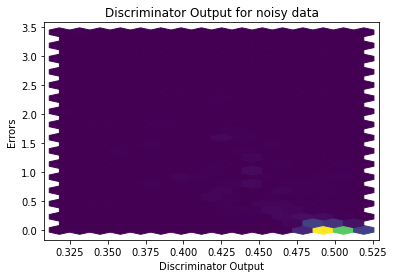

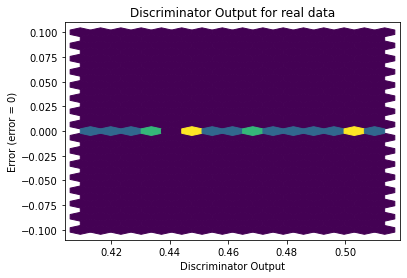

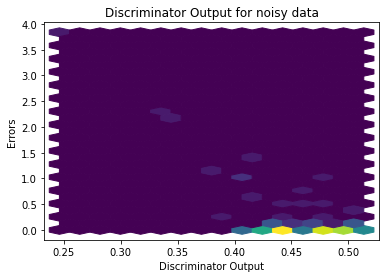

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


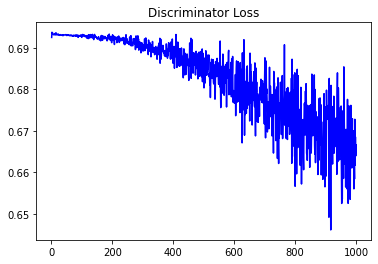

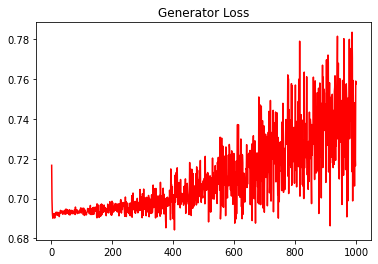

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.21451174651510901


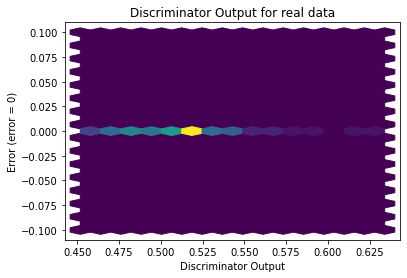

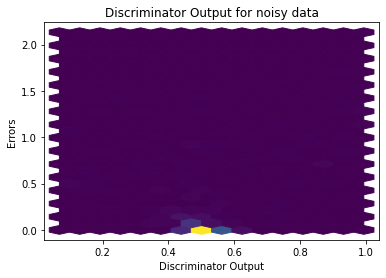

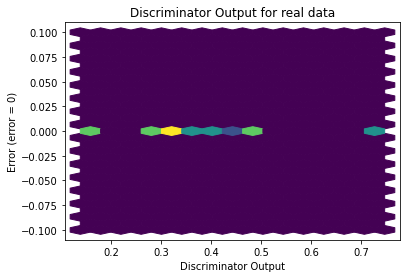

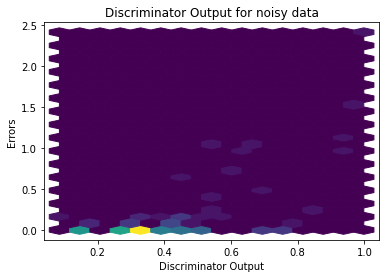

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
